Notes from Chapter 1 of the book "Modern computer vision with pytorch" by V. Kishore Ayyadevara and Yeshwanth Reddy (2020).

This notebook was modified from the original version available [here](https://github.com/PacktPublishing/Modern-Computer-Vision-with-PyTorch/blob/master/Chapter01/Chain_rule.ipynb).

# Feedforward propagation

Feedforward propagation is the process where the input is propagated through the network to produce the output. There are three steps involved: pre-activation, activation, and post-activation. During the pre-activation phase, the hidden layer is obtained by computing the sum of the product of inputs and weights. During the activation phase, we apply a non-linear activation function $f$ to the hidden layer. Finally, the post-activation consist in the computation of the sum of products of the hidden layer activation values and the weights to produce the output ($a$).  

$a = f(w_0 + \sum_{i=1}^{n} w_ix_i)$

where 

$a$ is the output or prediction outcome as a continuous or discrete variable.

$f$ is the activation function.

$w_0$ is the bias term.

$w_i$ are the weights that link input, hidden, and output layers.

$x_i$ are the input values. 

In [1]:
from copy import deepcopy
import numpy as np

def line():
    print('='*80)

def feed_forward(inputs, outputs, weights):
    '''Implements feedfordward propagation.
    
    Parameters
    ----------
    inputs: nxm array
      Training input layer (x_i)
    outputs: 1xm array
      Training output layer (a)
    weights: list with w_0 and w_i arrays.
      Weights or links connecting input, hidden, and output layers
    
    Returns
    -------
    float
      Loss as the Mean Square Error (MSE).
    '''
    # Pre-activation
    # Calculate hidden layer as the product w_i*x_i (dot product for matrix multiplication) plus the bias.
    # weights[0] are the weights connecting input layer with hidden layer. 
    # weights[1] are the bias w_0 associated with the hidden layer.
    pre_hidden = np.dot(inputs, weights[0]) + weights[1]
    
    # Activation
    # Apply f as a sigmoid activation function.
    hidden = 1/(1+np.exp(-pre_hidden))

    # Post-activation
    # Calculate the output layer (a)
    # weights[2] are the weights connecting the hidden layer with the output layer. 
    # weights[3] are the bias associated with the output layer.
    out = np.dot(hidden, weights[2]) + weights[3]
    
    # Calculate the loss as the MSE 
    mean_squared_error = np.mean(np.square(out - outputs))

    return mean_squared_error

# Backpropagation

During backpropagation, the weights are adjusted to minimize the error (loss). The process consists of adjusting the weights one at a time by a small amount.

Steps:

1. Change one weight at a time by adding a small amount to it.
2. Calculate the change in the loss induced by this change.
3. Update the weight by $-k \frac {\delta L}{\delta W}$, where $k$ is the learning rate.
4. Repeat steps 1-3 n *epochs* or iterations over the entire dataset.

In [2]:
def update_weights(inputs, outputs, weights, k):
    '''Implements gradient descent to update weights.
    
    Parameters
    ----------
    inputs: nxm array
      Training input layer (x_i)
    outputs: nx1 array
      Training output layer (a)
    weights: list with w_0 and w_i arrays.
      Weights or links connecting input, hidden, and output layers
    k: float
      Learning rate
    
    Returns
    -------
    (list, list)
      Tuple with list of updated weights and list of original weights
    '''
    # Create copies of the original weights list.
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)

    # Calculate loss with original set of weights.
    original_loss = feed_forward(inputs, outputs, original_weights)

    # Iterate through each weight in all 4 layers. 
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            # Update one weight at a time by a small amount.
            temp_weights[i][index] += 0.0001
            # Re-calculate loss with updated weight.
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            # Calculate the gradient of the loss with respect to the weight.
            grad = (_loss_plus - original_loss)/(0.0001)
            # Reduce the weight in proportion to the gradient multiplied by the learning rate (lr).
            updated_weights[i][index] -= grad*k

    return updated_weights, original_loss

In [3]:
# Generate random inputs and outputs.
x = np.array([[1,1]]) 
y = np.array([[0]])  
W = [
    # Weights connecting input layer with hidden layer.
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    # Bias connecting input layer with hidden layer.
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), 
    # Weights connecting hidden layer with output layer.
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T, 
    # Bias connecting hidden layer with output layer.
    np.array([-0.5516], dtype=np.float32)
]

Text(0.5, 1.0, 'Loss over increasing number of epochs')

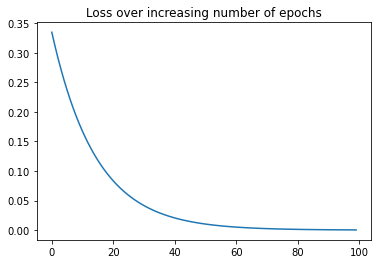

In [4]:
import matplotlib.pyplot as plt

losses = []
w = deepcopy(W)
for epoch in range(100):
    w, loss = update_weights(x,y,w,0.01)
    losses.append(loss)
plt.plot(losses)
plt.title('Loss over increasing number of epochs')

# Backpropagation using the Chain Rule

Calculate the change in loss value (C) using the chain rule. As an example, consider the following equation to calculate the change in loss value (C) with respect a single weight ($w_{11}$):

$\frac {\delta C}{\delta w_{11}} = \frac {\delta C}{\delta \hat y} \cdot \frac {\delta \hat y}{\delta a_{11}} \cdot \frac {\delta a_{11}}{\delta h_{11}} \cdot \frac {\delta h_{11}}{\delta w_{11}}$

where $\hat y$ is the predicted value, $a_{11}$ is a sigmoid activation function, and $h_{11}$ is the hidden layer.

Calculate $\hat y$, $a_{11}$, and $h_{11}$ for weight $w_{11}$.

In [5]:
pre_hidden = np.dot(x, W[0]) + W[1]
hidden = 1/(1+np.exp(-pre_hidden))
predicted_value = np.dot(hidden, W[2]) + W[3]

y_hat = predicted_value[0][0]
y = 0 
w_11 = W[0][0][0]
w_21 = W[2][0][0]
a_11 = hidden[0, 0]
x_1 = x[0][0]

In [6]:
updated_weights, _ = update_weights(x,y,W,1)

tmp = w_11 - (-2*(y-y_hat)*(w_21)*a_11*(1-a_11)*x_1)
print(tmp, updated_weights[0][0][0])

0.03748860333147175 0.037488014


Solving the partial derivatives of the loss function with respect to weight $w_{11}$, we get the following equation:

$\frac {\delta C}{\delta w_{11}} = -2 \cdot (y - \hat y) \cdot w_{21} \cdot a_{11} \cdot (1 - a_{11}) \cdot x_1$

In [7]:
def cr_solver(w, w2, a, x):
    '''Update weight w using the Chain Rule.

    Parameters
    ----------
    w: float
        Weight to modify
    w2: float
        Partial derivative of y_hat with respect to the activation a_i.
    a: float
        Activation value of the hidden layer.
    x: int
        Input value of the input layer.
    
    Returns
    -------
    float 
        New weight value.
    '''
    return w - (-2*(y-y_hat)*(w2)*a*(1-a)*x)

In [11]:
# Update pre-activation weights.

import pandas as pd

df = pd.DataFrame(columns=['weight', 'w2', 'a', 'update_weights', 'cr_solver'])
# Extract parameters.
df['weight'] = W[0].flatten()
df['w2'] = np.array([W[2],W[2]]).flatten()
df['a'] = np.array([hidden[0], hidden[0]]).flatten()
# Extract new weights calculated by update_weights function.
df['update_weights'] = updated_weights[0].flatten()
# Calculate new weights using the Chain Rule.
df['cr_solver'] = df.apply(lambda row: cr_solver(row['weight'], row['w2'], row['a'], 1), axis=1)
df

,weight,w2,a,update_weights,cr_solver
0,-0.0053,0.1528,0.589040,0.037488,0.037489
1,-0.5820,-0.1745,0.367792,-0.628946,-0.628937
2,-0.2723,-0.1135,0.463689,-0.304947,-0.304951
3,0.3793,0.1528,0.589040,0.422082,0.422089
4,-0.5204,-0.1745,0.367792,-0.567346,-0.567337
5,0.1896,-0.1135,0.463689,0.156948,0.156949


----------------------------------

Calculate the change in loss and update w one by one.

In [13]:
x = np.array([[1,1]]); 
y = np.array([[0]])  
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), 
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T, 
    np.array([-0.5516], dtype=np.float32)
]
line()
print('Loss:'.upper())
print(feed_forward(x,y,W))
line()
print('Weights:'.upper())
[print(w) for w in W]
line()
print('Updated Weights:'.upper())
for epx in range(1):
    updated_weights, _ = update_weights(x,y,W,1)
[print(w) for w in updated_weights];

LOSS:
0.33455008989960927
WEIGHTS:
[[-0.0053 -0.582  -0.2723]
 [ 0.3793 -0.5204  0.1896]]
[-0.014   0.5607 -0.0628]
[[ 0.1528]
 [-0.1745]
 [-0.1135]]
[-0.5516]
UPDATED WEIGHTS:
[[ 0.03748801 -0.62894595 -0.30494714]
 [ 0.42208242 -0.5673459   0.156948  ]]
[ 0.02878801  0.51375407 -0.09545201]
[[0.8341824 ]
 [0.25095794]
 [0.4228859 ]]
[0.60529804]


In [14]:
pre_hidden = np.dot(x, W[0]) + W[1]
hidden = 1/(1+np.exp(-pre_hidden))
predicted_value = np.dot(hidden, W[2]) + W[3]

In [15]:
tmp = W[0][0][0] - (-2*(0-(predicted_value[0][0]))*(W[2][0][0])*hidden[0,0]*(1-hidden[0,0])*x[0][0])
print(tmp, updated_weights[0][0][0])

0.03748860333147175 0.037488014


In [16]:
tmp = W[0][0][1] - (-2*(0-(predicted_value[0][0]))*(W[2][1][0])*hidden[0,1]*(1-hidden[0,1])*x[0][0])
print(tmp, updated_weights[0][0][1])

-0.6289373468565382 -0.62894595


In [17]:
tmp = W[0][0][2] - (-2*(0-(predicted_value[0][0]))*(W[2][2][0])*hidden[0,2]*(1-hidden[0,2])*x[0][0])
print(tmp, updated_weights[0][0][0])

-0.304951263947996 0.037488014


In [18]:
tmp = W[0][1][0] - (-2*(0-(predicted_value[0][0]))*(W[2][0][0])*hidden[0,0]*(1-hidden[0,0])*x[0][1])
print(tmp, updated_weights[0][1][0])

0.42208860145914084 0.42208242


In [19]:
tmp = W[0][1][1] - (-2*(0-(predicted_value[0][0]))*(W[2][1][0])*hidden[0,1]*(1-hidden[0,1])*x[0][1])
print(tmp, updated_weights[0][1][1])

-0.5673373173880019 -0.5673459


In [20]:
tmp = W[0][1][2] - (-2*(0-(predicted_value[0][0]))*(W[2][2][0])*hidden[0,2]*(1-hidden[0,2])*x[0][1])
print(tmp, updated_weights[0][1][2])

0.15694874675699821 0.156948


In [21]:
tmp = W[1][0] - (-2*(0-(predicted_value[0][0]))*hidden[0,0]*(1-hidden[0,0])*W[2][0][0])
print(tmp, updated_weights[1][0])

0.028788602743620932 0.028788012


In [22]:
tmp = W[1][1] - (-2*(0-(predicted_value[0][0]))*hidden[0,1]*(1-hidden[0,1])*W[2][1][0])
print(tmp, updated_weights[1][1])

0.5137626696420274 0.51375407


In [23]:
tmp = W[1][2] - (-2*(0-(predicted_value[0][0]))*hidden[0,2]*(1-hidden[0,2])*W[2][2][0])
print(tmp, updated_weights[1][2])

-0.0954512566166247 -0.09545201


In [24]:
tmp = W[2][0][0]-(-2*(0-(predicted_value[0][0]))*hidden[0][0])
print(tmp, updated_weights[2][0][0])

0.8342055621416937 0.8341824


In [25]:
tmp = W[2][1][0]-(-2*(0-(predicted_value[0][0]))*hidden[0][1])
print(tmp, updated_weights[2][1][0])

0.2509642654210383 0.25095794


In [26]:
tmp = W[2][2][0]-(-2*(0-(predicted_value[0][0]))*hidden[0][2])
print(tmp, updated_weights[2][2][0])

0.422898309408289 0.4228859


In [27]:
tmp = W[3][0]-(-2*(0-(predicted_value[0][0])))
print(tmp, updated_weights[3][0])

0.6052061234525776 0.60529804
